<a href="https://colab.research.google.com/github/bryandaetz1/TensorFlow_2.0/blob/main/TF2_0_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer

In [4]:
#load data
data = load_breast_cancer()

In [5]:
type(data)

sklearn.utils.Bunch

In [6]:
#bunch object acts like a dictionary where you can treat the keys like attributes
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
#the 'data' attribute is the input data
data.data.shape

(569, 30)

In [9]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
data.target.shape

(569,)

In [12]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
#split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.33)
N, D = X_train.shape

In [15]:
#scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
#build the tensorflow model
model = tf.keras.models.Sequential(
    [tf.keras.layers.Input(shape=(D,)),
     tf.keras.layers.Dense(1, activation='sigmoid')]
     )

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [21]:
#train the model
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)

Epoch 1/100
12/12 [==============================] - 0s 14ms/step - loss: 0.3599 - accuracy: 0.8819 - val_loss: 0.3529 - val_accuracy: 0.9043
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3322 - accuracy: 0.8950 - val_loss: 0.3233 - val_accuracy: 0.9096
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3081 - accuracy: 0.9081 - val_loss: 0.2992 - val_accuracy: 0.9149
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.2882 - accuracy: 0.9186 - val_loss: 0.2788 - val_accuracy: 0.9202
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.2711 - accuracy: 0.9239 - val_loss: 0.2614 - val_accuracy: 0.9309
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.2566 - accuracy: 0.9265 - val_loss: 0.2462 - val_accuracy: 0.9362
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.2443 - accuracy: 0.9291 - val_loss: 0.2330 - val_accuracy: 0.9362
Epoch 8/100


In [22]:
#evaluate the model - evaluate() returns loss and accurary
print('Train score:', model.evaluate(X_train, y_train))
print('Test score:', model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 1ms/step - loss: 0.0871 - accuracy: 0.9843
Train score: [0.08713214844465256, 0.9842519760131836]
6/6 [==============================] - 0s 2ms/step - loss: 0.0731 - accuracy: 0.9734
Test score: [0.07308607548475266, 0.9734042286872864]


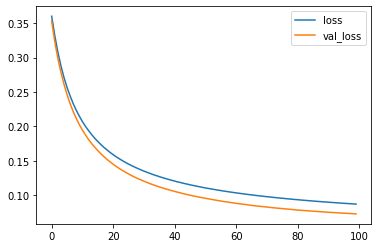

In [23]:
#plot what's returned by model.fit()
import matplotlib.pyplot as plt

#plotting loss per iteration
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

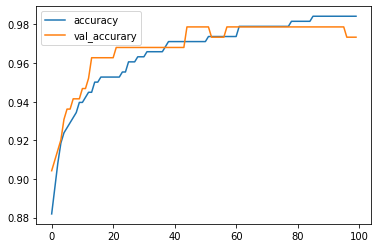

In [24]:
#plotting accuracy per iteration
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accurary')
plt.legend()